# Unit 1 Concept check

**Time:** 30 minutes

This is intended to be a quick review of the concepts we've covered up until now. Each question shouldn't take too long, so if you don't know an answer, skip it and come back to it later if there's time. Oh, and think of this as a "closed book" assessmnt, so no "Googling". :)

*This won't be graded, but will help Zunayed and me to assess student understanding in the class.*

**We ask that you submit this notebook with your answers to [[dropbox link]]**

In [3]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for plotting
sns.mpl.rc("figure", figsize=(12,4))
sns.set_context("notebook", font_scale=2)

# this allows plots to appear directly in the notebook
%matplotlib inline

# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


#### Question 1: How many rows does this dataframe have?

Answer: 200

#### Question 2: What is the average sales?

Answer: 14.02

#### Question 3: Does the TV column have any repeated values?

Answer: 10

In [12]:
data["TV"].duplicated().sum()

10

#### Question 4: What are the types of each of the columns?

Answer: floats

In [14]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


#### Question 5: Filter the dataframe to only include rows where sales > 25

Answer:

In [15]:
data[data["Sales"]>25]

,TV,Radio,Newspaper,Sales
37,266.9,43.8,5.0,25.4
99,289.7,42.3,51.2,25.4
148,243.2,49.0,44.3,25.4
176,276.9,48.9,41.8,27.0
184,287.6,43.0,71.8,26.2
199,283.6,42.0,66.2,25.5


#### Question 5: What are the **predictors/features**?

Answer: TV, Radio, Newspaper

#### Question 5: What is the **response** (sometimes also called target)?

Answer: Sales

#### Question: Which pair of features are the most strongly correlated? What is the correlation coefficient for this pair?

Answer: Newspaper and Radio are the mostly strongly correlated at 0.354104 correlation coefficient.

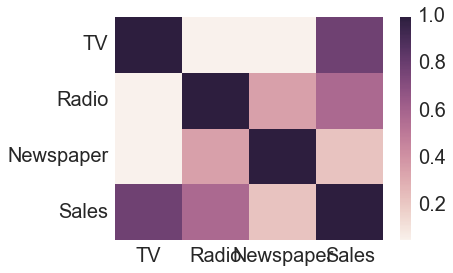

In [4]:
sns.heatmap(data.corr())

##### Create a boxplot including only the `TV`, `Radio`, and `Newspaper` columns

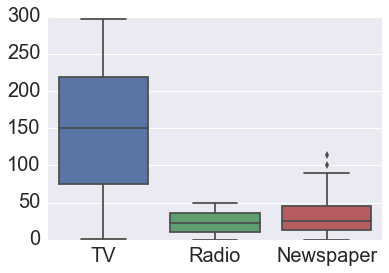

In [8]:
plt = sns.boxplot(data[["TV", "Radio", "Newspaper"]])

##### Create a regplot plot of sales as a function of TV Spend

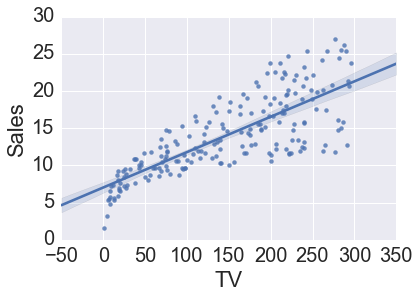

In [12]:
plt = sns.regplot("TV", "Sales", data=data);

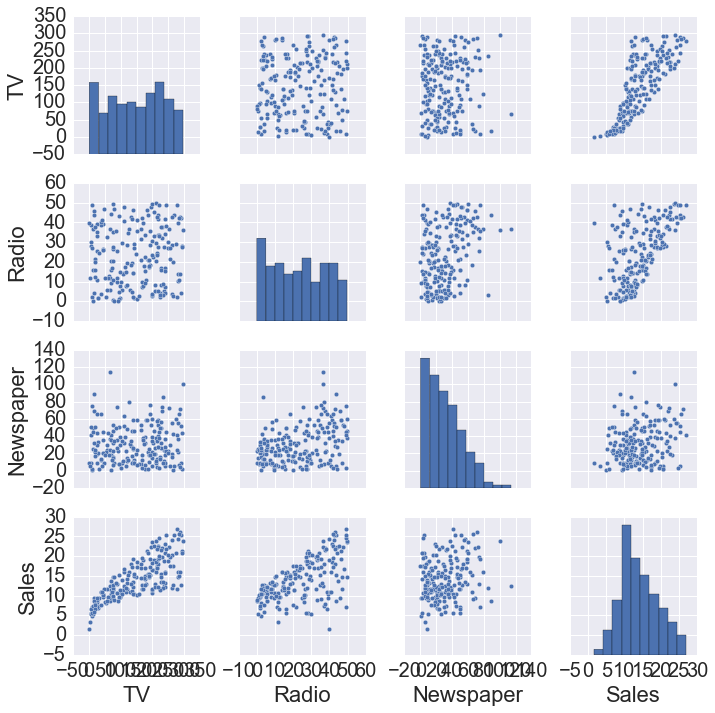

In [13]:
sns.pairplot(data)

## Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this new device. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?

#### Is there a relationship between ads and sales?

Answer:

#### Is this a causal relationship? Why or why not? 

Answer: 

#### What other questions might you have about this data?

Answer:


---

Let's use **Statsmodels** to estimate the association between advertising efforts and sales. 

In [12]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
#formula notification is the equivalent to writing out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='Sales ~ TV', data=data).fit()

#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 16 Jun 2016   Prob (F-statistic):           1.47e-42
Time:                        06:04:22   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000         6.130     7.935
TV             0.0475      0.003     17.668      0.000         0.042     0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Question: Is this a statistically meaningful correlation (Based on a 95% confidence interval)? How can you tell?

Answer: p val is 0 and interval doesn't contain 0

#### Question: In your own words, what does R-squared represent?
    
Answer: The percent of variation that is accounted for by the included variables

### Are there any questions you have for us?

In [23]:
sales_mean = data[["Sales"]].mean()
print sales_mean

Sales    14.0225
dtype: float64


In [17]:
sales_std = data[["Sales"]].std()
print sales_std


Sales    5.217457
dtype: float64


In [24]:
data[data[["Sales"]] > sales_mean + sales_std].sum()


TV             0.0
Radio          0.0
Newspaper      0.0
Sales        806.0
dtype: float64